# EDA Piracy-Analisis

<img src="https://www.cnet.com/a/img/resize/d197bb057a9d19485045f026c285f55797237d26/hub/2019/08/30/bfaa1e15-1383-4dd0-a8be-acb49dcb944f/piracy-phone-4.jpg?auto=webp&fit=crop&height=675&width=1200">

## Librerias

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

## Variables

In [63]:
alpha = 0.05

In [178]:
df1 = pd.read_csv('data_set_obada_excel.csv', on_bad_lines='skip', sep=";")
df1.rename(columns={"fecha": "date"}, inplace=True)
df1.rename(columns={"origen": "source_link"}, inplace=True)
df1.head()

,Title,url,source_link,date,type,year
0,Jurassic World Fallen Kingdom,https://powvideo.org/tk6wsdhzmzl9,https://playdede.us/pelicula/jurassic_world_el...,06/11/2023 8:43,3,2018
1,Jurassic World Fallen Kingdom,https://powvideo.org/a3s0i9fmulr3,https://playdede.us/pelicula/jurassic_world_el...,06/11/2023 8:43,3,2018
2,Jurassic World Fallen Kingdom,https://powvideo.org/47nrvjqayy9m,https://playdede.us/pelicula/jurassic_world_el...,06/11/2023 8:43,3,2018
3,Jurassic World Fallen Kingdom,https://filemoon.sx/e/7ynant5ib50z,https://swatchseries.mx/movie/jurassic-world-f...,12/11/2023 3:53,3,2018
4,Jurassic World Fallen Kingdom,https://mixdrop.to/e/0v03xnddfrjpx0,https://assistironlinegratis.pro/jurassic-worl...,06/11/2023 12:52,3,2018


In [179]:
df2 = pd.read_csv('data_set_obada2.csv', on_bad_lines='skip', sep=";")
df2.head()

,Title,Rate,Money
0,Jurassic World Fallen Kingdom,6.1,"417,719,760"
1,Minions,6.4,"336,045,770"
2,Jurassic World,6.9,"653,406,625"
3,Suits,8.4,NaN
4,Chicago Med,7.6,NaN


In [180]:
df3 = pd.merge(df1,
               df2,
               on='Title',
               how='left')
df3.head()

,Title,url,source_link,date,type,year,Rate,Money
0,Jurassic World Fallen Kingdom,https://powvideo.org/tk6wsdhzmzl9,https://playdede.us/pelicula/jurassic_world_el...,06/11/2023 8:43,3,2018,6.1,"417,719,760"
1,Jurassic World Fallen Kingdom,https://powvideo.org/a3s0i9fmulr3,https://playdede.us/pelicula/jurassic_world_el...,06/11/2023 8:43,3,2018,6.1,"417,719,760"
2,Jurassic World Fallen Kingdom,https://powvideo.org/47nrvjqayy9m,https://playdede.us/pelicula/jurassic_world_el...,06/11/2023 8:43,3,2018,6.1,"417,719,760"
3,Jurassic World Fallen Kingdom,https://filemoon.sx/e/7ynant5ib50z,https://swatchseries.mx/movie/jurassic-world-f...,12/11/2023 3:53,3,2018,6.1,"417,719,760"
4,Jurassic World Fallen Kingdom,https://mixdrop.to/e/0v03xnddfrjpx0,https://assistironlinegratis.pro/jurassic-worl...,06/11/2023 12:52,3,2018,6.1,"417,719,760"


## Cambiar el tipo de dato de la columna data

In [181]:
df3['date'] = pd.to_datetime(df3['date'],  dayfirst=True)
df3.head()
df3.dtypes

Title                  object
url                    object
source_link            object
date           datetime64[ns]
type                    int64
year                    int64
Rate                  float64
Money                  object
dtype: object

## Cambiar el tipo de dato de la columna Money

In [182]:
df3['Money'] = df3['Money'].map(lambda x: int(x.replace(',', '' )) if type(x) == str else x)

## Crear las columnas nuevas host + page

In [183]:
# extraer informacion extra de las columnas url + source_link
df3['host'] = df3['url'].str.extract(r'://([^/]+)')
df3['page'] = df3['source_link'].str.extract(r'://([^/]+)')
df3.head()

,Title,url,source_link,date,type,year,Rate,Money,host,page
0,Jurassic World Fallen Kingdom,https://powvideo.org/tk6wsdhzmzl9,https://playdede.us/pelicula/jurassic_world_el...,2023-11-06 08:43:00,3,2018,6.1,417719760.0,powvideo.org,playdede.us
1,Jurassic World Fallen Kingdom,https://powvideo.org/a3s0i9fmulr3,https://playdede.us/pelicula/jurassic_world_el...,2023-11-06 08:43:00,3,2018,6.1,417719760.0,powvideo.org,playdede.us
2,Jurassic World Fallen Kingdom,https://powvideo.org/47nrvjqayy9m,https://playdede.us/pelicula/jurassic_world_el...,2023-11-06 08:43:00,3,2018,6.1,417719760.0,powvideo.org,playdede.us
3,Jurassic World Fallen Kingdom,https://filemoon.sx/e/7ynant5ib50z,https://swatchseries.mx/movie/jurassic-world-f...,2023-11-12 03:53:00,3,2018,6.1,417719760.0,filemoon.sx,swatchseries.mx
4,Jurassic World Fallen Kingdom,https://mixdrop.to/e/0v03xnddfrjpx0,https://assistironlinegratis.pro/jurassic-worl...,2023-11-06 12:52:00,3,2018,6.1,417719760.0,mixdrop.to,assistironlinegratis.pro


In [186]:
df3['day'] = df3['date'].dt.day_name()

In [187]:
df3.head()

,Title,url,source_link,date,type,year,Rate,Money,host,page,day
0,Jurassic World Fallen Kingdom,https://powvideo.org/tk6wsdhzmzl9,https://playdede.us/pelicula/jurassic_world_el...,2023-11-06 08:43:00,3,2018,6.1,417719760.0,powvideo.org,playdede.us,Monday
1,Jurassic World Fallen Kingdom,https://powvideo.org/a3s0i9fmulr3,https://playdede.us/pelicula/jurassic_world_el...,2023-11-06 08:43:00,3,2018,6.1,417719760.0,powvideo.org,playdede.us,Monday
2,Jurassic World Fallen Kingdom,https://powvideo.org/47nrvjqayy9m,https://playdede.us/pelicula/jurassic_world_el...,2023-11-06 08:43:00,3,2018,6.1,417719760.0,powvideo.org,playdede.us,Monday
3,Jurassic World Fallen Kingdom,https://filemoon.sx/e/7ynant5ib50z,https://swatchseries.mx/movie/jurassic-world-f...,2023-11-12 03:53:00,3,2018,6.1,417719760.0,filemoon.sx,swatchseries.mx,Sunday
4,Jurassic World Fallen Kingdom,https://mixdrop.to/e/0v03xnddfrjpx0,https://assistironlinegratis.pro/jurassic-worl...,2023-11-06 12:52:00,3,2018,6.1,417719760.0,mixdrop.to,assistironlinegratis.pro,Monday


## Guardar dataframe

In [188]:
df3.to_csv('data_set_final.csv', index=False)

## Top 10 paginas de pirata por cantidad de videos

In [191]:
top_10_pages = df3['page'].value_counts()[:10].reset_index()

<Axes: xlabel='page', ylabel='count'>

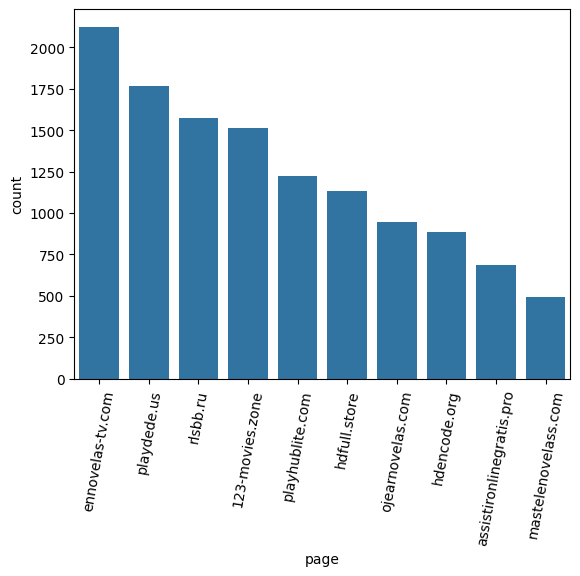

In [192]:
plot = sns.barplot(top_10_pages, x="page", y="count")
plt.xticks(rotation=80) 
plot

## Top 10 Host

<Axes: xlabel='host', ylabel='count'>

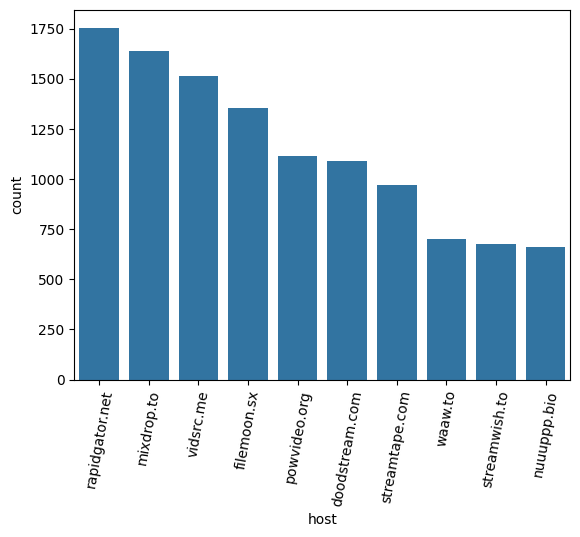

In [193]:
top_10_pages = df3['host'].value_counts()[:10].reset_index()
plot = sns.barplot(top_10_pages, x="host", y="count")
plt.xticks(rotation=80) 
plot

## Videos por day

<Axes: xlabel='day', ylabel='count'>

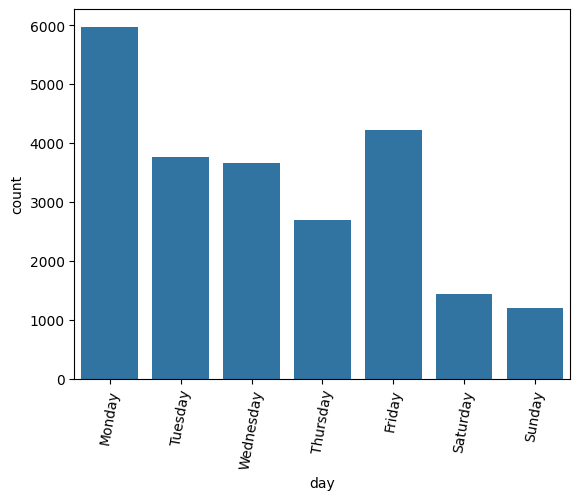

In [194]:
plot = sns.countplot(df3, x="day", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=80) 
plot

## Relacion entre el rate y la cantidad de videos

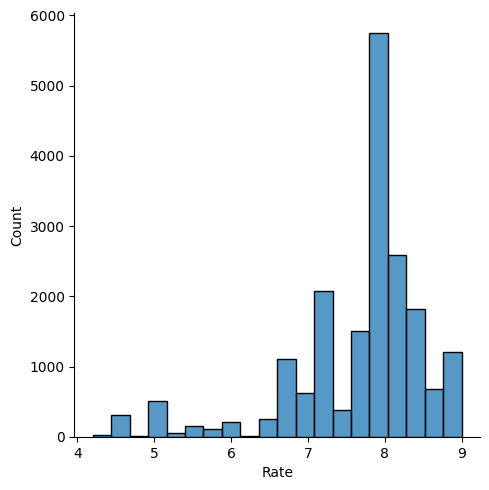

In [195]:
sns.displot(df3, x='Rate', bins=20)

## Top 10 peliculas por Rate

In [196]:
top_10_rate = df3.sort_values(by='Rate', ascending=False)[['Title','Rate']].drop_duplicates()[:10]
top_10_rate

,Title,Rate
6196,The Office,9.0
9574,Enfermeras,8.9
17536,One Piece,8.9
9652,Pa quererte,8.7
5255,Dr House,8.7
9842,La Nieta Elegida,8.6
15397,Oppenheimer,8.5
9804,Café con aroma de mujer,8.4
8814,Yo Soy Betty La Fea,8.3
14263,The First Slam Dunk,8.3


## Peores 10 peliculas por Rate

In [197]:
peor_10_rate = df3.sort_values(by='Rate', ascending=True)[['Title','Rate']].drop_duplicates()[:10]
peor_10_rate

,Title,Rate
17538,Haunting of the Queen Mary,4.2
17553,"Last Call, Rio!",4.4
18787,After 5: After Everything,4.6
9558,Los Rodríguez y El Más Allá,4.7
19558,The Exorcist Believer,5.0
15294,Vacaciones de Verano,5.0
12813,Halloween Ends,5.0
9596,El Final del Paraíso,5.0
13346,Rally Road Racers,5.1
19676,Invitación a un Asesinato,5.1


## Pelicula mas pirateada

In [137]:
top1_pelicula = df3[df3['type']==3]
top1_pelicula = top1_pelicula['Title'].value_counts()
top1_pelicula = top1_pelicula.index[0]
top1_pelicula

'Oppenheimer'

## Serie mas pirateada

In [136]:
top1_serie = df3[df3['type']==4]
top1_serie = top1_serie['Title'].value_counts()
top1_serie = top1_serie.index[0]
top1_serie

'Pasión de gavilanes'

## Top 15 peliculas por Money

In [207]:
df_top50 = df3.sort_values(by='Money', ascending=False)[['Title', 'Money','Rate']].drop_duplicates()[:15]
df_top50

,Title,Money,Rate
103,Jurassic World,653406625.0,6.9
13072,The Super Mario Bros. Movie,574934330.0,7.1
1,Jurassic World Fallen Kingdom,417719760.0,6.1
12198,Jurassic World Dominion,376851080.0,5.6
12229,Minions The Rise of Gru,369695210.0,6.5
40,Minions,336045770.0,6.4
16074,Oppenheimer,324281160.0,8.5
9701,Despicable Me (2010),251557985.0,7.6
9775,Fast & Furious 9,238679850.0,7.0
12836,Puss in Boots The Last Wish,185535345.0,7.8


## Peor 15 peliculas por Money

In [208]:
df_pero50 = df3.sort_values(by='Money', ascending=True)[['Title', 'Money', 'Rate']].drop_duplicates()[:15]
df_pero50

,Title,Money,Rate
4742,La ley del deseo,72442.0,7.1
14133,Extraña forma de vida,486735.0,6.3
21736,Cuando Acecha la Maldad,544725.0,7.2
13346,Rally Road Racers,744169.0,5.1
14263,The First Slam Dunk,1275149.0,8.3
4753,Tacones lejanos,1710057.0,7.0
4755,Carne trémula,1785901.0,7.3
9832,Parallel Mothers,2297501.0,7.1
4799,La piel que habito,3185812.0,7.6
4751,Atame,4087361.0,7.0


## Hipotesis
**H0**: No hay evidencia significativa de que las peliculas con mas Rate son las peliculas que mas dinero han generado.

**H1**: Existe una diferencia significativa entre las peliculas con mas Rate y las peliculas que mas dinero han generado.

In [203]:
##Crear el mismo dataframe que no tenga valores nulos de rate + money
df_sin_null = df3.dropna()


In [206]:
p_h = df_sin_null['Rate']
p_m = df_sin_null['Money']

ttest = stats.ttest_ind(p_h, p_m)
ttest

if ttest[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa de que las peliculas con mas Rate son las peliculas que mas dinero han generado"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa de que las peliculas con mas Rate son las peliculas que mas dinero han generado"
